# Tertiary Segmentation

This notebook will explore the next set of segmenation options

## Author: Alexander Goudemond, Student Number: 219030365

What we are going to try here is identify if the colours on the Manually Segmented Images are assigned Randomly, or if they contain Semantic Information!

# Imports


In [2]:
from os import getcwd, walk, mkdir, stat, remove
from os import sep # used later on, in a function, to print directory contents
from os.path import exists, basename, join

from shutil import copyfile

from PIL.Image import fromarray
import cv2

import matplotlib.pyplot as plt
import numpy as np

# Directory of Images

In [6]:
def get_directories(startPath):
    location_array = []
    acceptable_folders = ["SEG"]

    for root, dirs, files in walk(startPath):
        # skip this folder
        if ("OriginalZipped" in root):
            continue

        elif (root[ -3 : ] not in acceptable_folders):
            continue

        location_array.append(root)
    
    return location_array
###

In [7]:
current_directory = getcwd()
desired_directory = "..\\..\\Comp700_Segmented"

In [8]:
path = (current_directory + "\\" + desired_directory)
location_array = get_directories(path)

In [9]:
# first 10
print( location_array[0:10] ) 
print("Number of folders:", len( location_array ) ) 

['c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_ST\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_ST\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\01_GT\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\01_ST\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\02_GT\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\BF-C2DL-MuSC\\BF-C2DL-MuSC\\02_ST\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\DIC-C2DH-HeLa\\DIC-C2DH-HeLa\\01_GT\\SEG

We can now open 1 and see if the coluors are consistent

In [70]:
def plotSideBySide(imageArray, numRows, numCols):
    fig, axs = plt.subplots(numRows, numCols)
    index = 0

    for i in range(numRows):
        for j in range(numCols):
            img = cv2.imread(imageArray[index], 0)
            axs[i, j].imshow(img)
            fig.set_size_inches(20, 15)
            index += 1

    plt.show()
###


c:\Users\G5\Documents\GitHub\COMP700\..\..\Comp700_Segmented\Fluo-N2DL-HeLa\Fluo-N2DL-HeLa\01_GT\SEG
['man_seg012.tif', 'man_seg013.tif', 'man_seg014.tif', 'man_seg015.tif', 'man_seg020.tif', 'man_seg021.tif', 'man_seg022.tif', 'man_seg023.tif', 'man_seg025.tif', 'man_seg029.tif']
28
['c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\Fluo-N2DL-HeLa\\Fluo-N2DL-HeLa\\01_GT\\SEG\\man_seg012.tif', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\Fluo-N2DL-HeLa\\Fluo-N2DL-HeLa\\01_GT\\SEG\\man_seg013.tif', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\Fluo-N2DL-HeLa\\Fluo-N2DL-HeLa\\01_GT\\SEG\\man_seg014.tif', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_Segmented\\Fluo-N2DL-HeLa\\Fluo-N2DL-HeLa\\01_GT\\SEG\\man_seg015.tif']


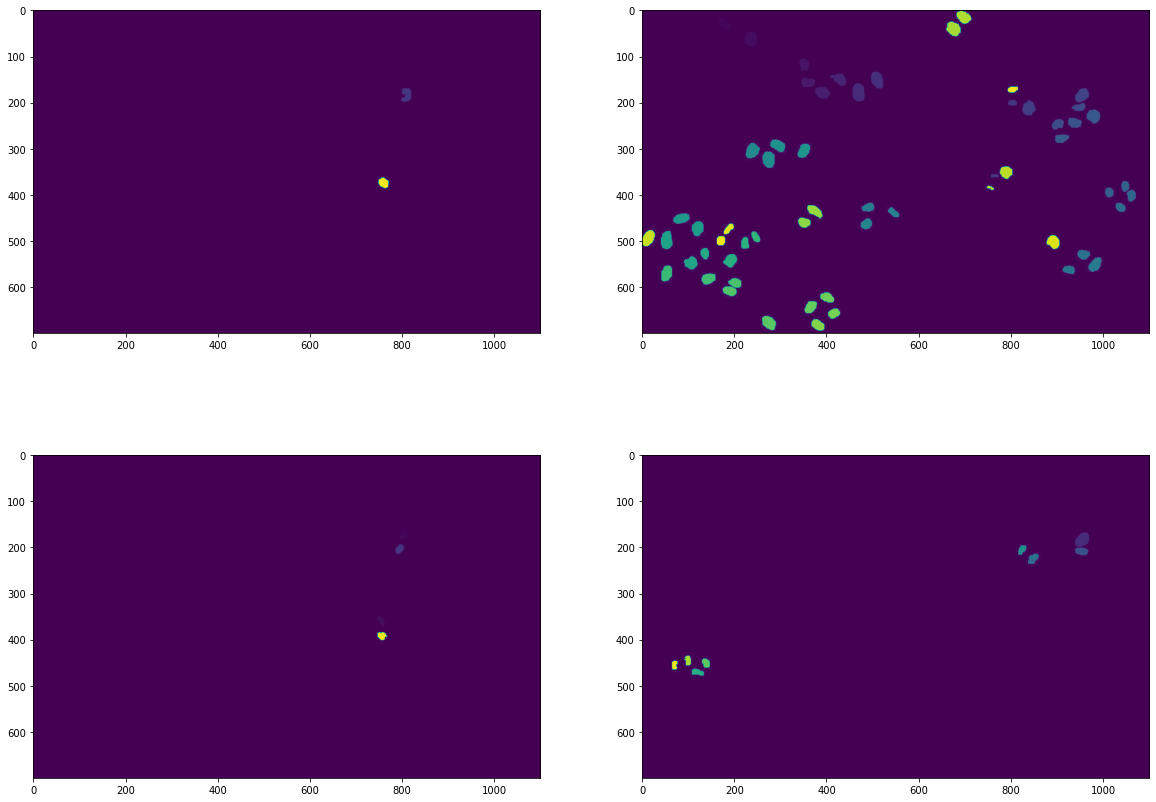

In [74]:
from random import randint

index = randint(0, len(location_array)-1)
path = walk(location_array[index])

print(location_array[index])

picArray = []

for root, dirs, files in path:
    # print(files)
    for file in files:
        picArray.append(file)

print(picArray[0:10])
print(len(picArray))

numRows = 2; numCols = 2

if (len(picArray) == 1):
    numRows = 1; numCols = 1
elif (len(picArray) == 2):
    numRows = 1; numCols = 2
elif (len(picArray) == 3):
    numRows = 1; numCols = 3
elif (len(picArray) == 4):
    numRows = 2; numCols = 2

imageArray = []

for i in range(len(picArray)):
    if (i >= 4):
        break
    imageArray.append(location_array[index] + "\\" + picArray[i])

print(imageArray)

plotSideBySide(imageArray, numRows, numCols)

Unfortunately, the images are not coloured in any particular way! So we have to find another way to segment them... Perhaps we could return to our previous attempt and try identify why the data turned out the way it did?